# Plotly advance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## 1. Scatter plot

In [5]:
fig1 = px.scatter(df, x='sepal_length', y='sepal_width', color='species')
fig1.show()

## 2. line plot

In [6]:
df_sort = df.sort_values(by='sepal_length')
fig2 = px.line(df_sort, x='sepal_length', y='sepal_width', color='species')
fig2.show()

## 3. barplot

In [13]:
# grouping values based on mean
df_group = df.groupby(["species"]).mean().reset_index()
df_group

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


In [14]:
fig3 = px.bar(df_group,x='species',y='sepal_width')
fig3.show()

<Axes: xlabel='species', ylabel='sepal_width'>

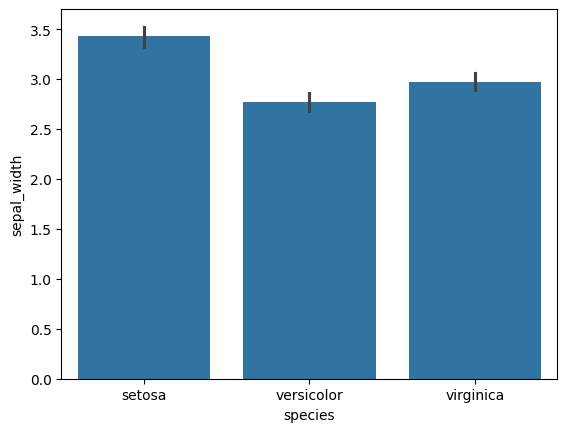

In [15]:
sns.barplot(data=df,x='species',y='sepal_width')

## 4. Boxplot

In [17]:
fig4 = px.box(df,x='species',y='sepal_width',color="species")
fig4.show()

## 5. Violon plot

In [19]:
fig5 = px.violin(df,x='species',y='sepal_width',color="species",box=True)
fig5.show()

## 6. Histogram

In [25]:
fig6 = px.histogram(df,x='sepal_width',color='species')
fig6.show()

## 7. piechart

In [31]:
df_count = df["species"].value_counts().reset_index()
df_count.columns = ["species","count"]
df_count

,species,count
0,setosa,50
1,versicolor,50
2,virginica,50


In [32]:
fig7 = px.pie(df_count,values="count",names="species")
fig7.show()

## 8. 3D scatter plot

In [34]:
fig8 = px.scatter_3d(df,x='sepal_length',y='sepal_width',z='petal_width',color="species")
fig8.show()

## 9. Areachart

In [36]:
df_area = df.sort_values(by = ["sepal_length"])
fig9 = px.area(df_area,x='sepal_width',y='sepal_length',color="species")
fig9.show()

## 10. Bubble chart

In [39]:
fig10 = px.scatter(df,x="sepal_width",y='sepal_length',color="species",size="petal_width")
fig10.show()

## 11. Sunburst chart

In [47]:
df_sunburst = df.groupby(["species","petal_width"]).size().reset_index(name="count")
df_sunburst

fig11 = px.sunburst(df_sunburst,path=["species","petal_width"],values="count")
fig11.show()

## 12. Parallel Coordinate plot

In [51]:
# parallel coordinates
df["species_id"] = df["species"].astype('category').cat.codes

fig12 = px.parallel_coordinates(df, color="species_id", labels={'species_id': "species"})
fig12.show()

## 13. Density contour plot

In [53]:
fig13 = px.density_contour(df,x="sepal_width",y="sepal_length",color="species")
fig13.show()

## 14. Scatter Ternary plot

In [55]:
fig14 = px.scatter_ternary(df,a="sepal_width",b="sepal_length",c="petal_width",color="species")
fig14.show()

## 15. Polor chart (radar chart)

In [57]:
df_radar = df.groupby(["species"]).mean().reset_index()

fig15 = px.line_polar(df_radar,r="petal_width",theta="species",line_close=True)
fig15.show()

In [59]:
plt.gr

Figure({
    'data': [{'hovertemplate': 'species=setosa<br>sepal_length=%{x}<br>sepal_width=%{y}<extra></extra>',
              'legendgroup': 'setosa',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'setosa',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8, 4.3,
                          5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. , 5. , 5.2,
                          5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4, 5.1, 5. , 4.5,
                          4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ]),
              'xaxis': 'x',
              'y': array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. , 3. ,
                          4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. , 3.4, 3.5,
                          3.4, 3.2, 3.1